# In this notebook, we study the convergence of our algorithm for Poisson equation

# 1. In the first example, we set
$$
f(x) = \sum_{k=0}^K \xi_k\sin(2\pi k x).
$$
for $K=1000000$, where $\xi_k$ is an uniform random variable in $[0, 1]$. In this case, we have
$f\in H^{-s}_0$, where $s > \frac{1}{2}$. We set $s=1$. Then, we measure the convergence of $u_{\gamma}$ to the true solution $u_0$ in $H^1$ as $\gamma \rightarrow 0$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from jax import vmap

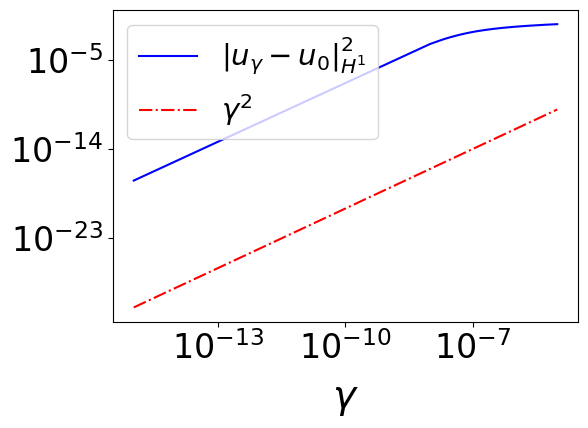

In [11]:
SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 26

plt.rcParams['axes.labelpad'] = 10
#plt.rcParams["figure.figsize"] = (8, 6)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=21)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


s = 1
q = 2
alpha = 1

K = 1000000
xi = np.random.uniform(0, 1, K)
ks = np.array(np.arange(0, K) + 1)
lambdas = 4 * np.pi ** 2 * ks

norm =lambda gamma: np.sum(gamma ** 2 * xi ** 2 * lambdas ** (alpha - 2 + 2 * (q + s -2)) / ((1 + gamma * lambdas ** (q + s - 2)) ** 2))


fig = plt.figure()
gammas = np.linspace(1e-15, 1e-5, 1000)
plt.loglog(gammas, vmap(norm)(gammas), 'b-', label=r'$\|u_{\gamma}-u_0\|_{H^1}^2$')
plt.loglog(gammas, gammas ** 2, 'r-.', label=r'$\gamma^2$')
plt.xlabel(r'$\gamma$')
plt.legend(loc='upper left')
fig.tight_layout()
plt.savefig('results/poisson/s1.png', bbox_inches='tight')


# 2. In the second example, we set
$$
f(x) = \sum_{k=0}^K k\xi_k\sin(2\pi k x).
$$
for $K=1000$, where $\xi_k$ is an uniform random variable in $[0, 1]$. In this case, we have
$f\in H^{-s}_0$, where $s > \frac{3}{2}$. We set $s=2$. Then, we measure the convergence of $u_{\gamma}$ to the true solution $u_0$ in $H^0=L^2$ as $\gamma \rightarrow 0$.

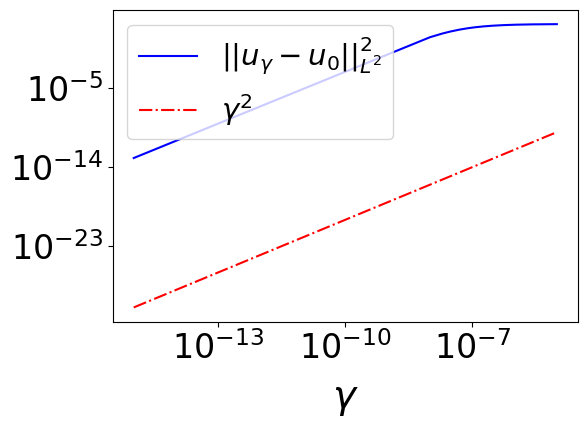

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from jax import vmap

SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 26

plt.rcParams['axes.labelpad'] = 10
#plt.rcParams["figure.figsize"] = (8, 6)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=21)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


s = 2
q = 1
alpha = 0

K = 1000000
xi = np.random.uniform(0, 1, K)
ks = np.array(np.arange(0, K) + 1)
lambdas = 4 * np.pi ** 2 * ks
fs = xi * ks

norm =lambda gamma: np.sum(gamma ** 2 * fs ** 2 * lambdas ** (alpha - 2 + 2 * (q + s -2)) / ((1 + gamma * lambdas ** (q + s - 2)) ** 2))

fig = plt.figure()
gammas = np.linspace(1e-15, 1e-5, 1000)
plt.loglog(gammas, vmap(norm)(gammas), 'b-', label=r'$\|\|u_{\gamma}-u_0\|\|_{L^2}^2$')
plt.loglog(gammas, gammas ** 2, 'r-.', label=r'$\gamma^2$')
plt.xlabel(r'$\gamma$')
plt.legend(loc='upper left')
fig.tight_layout()
plt.savefig('results/poisson/s2.png', bbox_inches='tight')


# 3. In the second example, we set
$$
f(x) = \sum_{k=0}^K k\xi_k\sin(2\pi k x).
$$
for $K=10^6$, where $\xi_k$ is an uniform random variable in $[0, 1]$. In this case, we have
$f\in H^{-s}_0$, where $s > \frac{3}{2}$. We set $s=2$. Then, we measure the convergence of $u_{\gamma}$ to the true solution $u_0$ in $H^1$ as $\gamma \rightarrow 0$, which violates the condition given by the theorem.


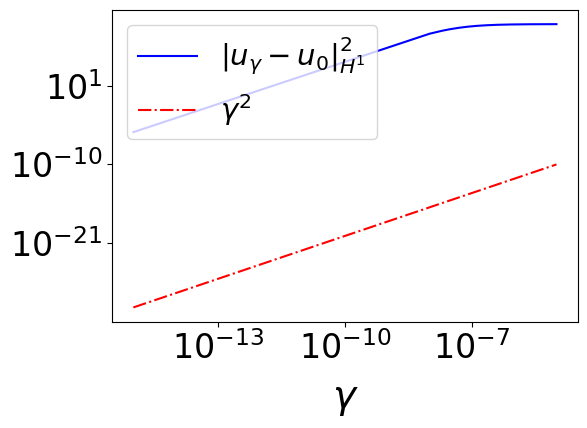

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from jax import vmap

SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 26

plt.rcParams['axes.labelpad'] = 10
#plt.rcParams["figure.figsize"] = (8, 6)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=21)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


s = 2
q = 1
alpha = 1

K = 1000000
xi = np.random.uniform(0, 1, K)
ks = np.array(np.arange(0, K) + 1)
lambdas = 4 * np.pi ** 2 * ks
fs = xi * ks

norm =lambda gamma: np.sum(gamma ** 2 * fs ** 2 * lambdas ** (alpha - 2 + 2 * (q + s -2)) / ((1 + gamma * lambdas ** (q + s - 2)) ** 2))

fig = plt.figure()
gammas = np.linspace(1e-15, 1e-5, 1000)
plt.loglog(gammas, vmap(norm)(gammas), 'b-', label=r'$\|u_{\gamma}-u_0\|_{H^1}^2$')
plt.loglog(gammas, gammas ** 2, 'r-.', label=r'$\gamma^2$')
plt.xlabel(r'$\gamma$')
plt.legend(loc='upper left')
fig.tight_layout()
plt.savefig('results/poisson/s1_violate.png', bbox_inches='tight')


# 4. In the forth example, we set
$$
f(x) = \sum_{k=0}^K k^2\xi_k\sin(2\pi k x).
$$
for $K=10^6$, where $\xi_k$ is an uniform random variable in $[0, 1]$. In this case, we have
$f\in H^{-s}_0$, where $s > \frac{5}{2}$. We set $s=3$. Then, we measure the convergence of $u_{\gamma}$ to the true solution $u_0$ in $H^{-1}$ as $\gamma \rightarrow 0$.

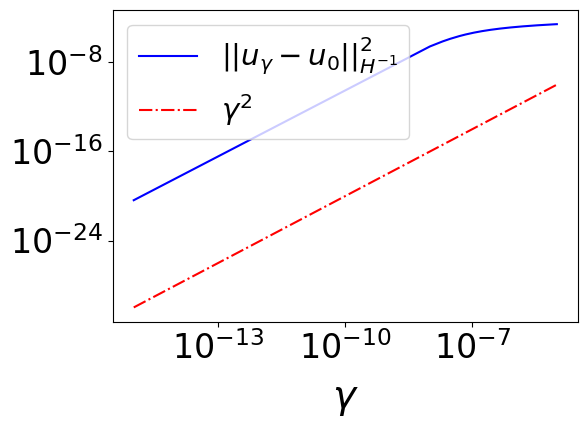

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from jax import vmap

SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 26

plt.rcParams['axes.labelpad'] = 10
#plt.rcParams["figure.figsize"] = (8, 6)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=21)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


s = 3
q = 0
alpha = -1

K = 1000000
xi = np.random.uniform(0, 1, K)
ks = np.array(np.arange(0, K) + 1)
lambdas = 4 * np.pi ** 2 * ks
fs = xi * ks

norm =lambda gamma: np.sum(gamma ** 2 * fs ** 2 * lambdas ** (alpha - 2 + 2 * (q + s -2)) / ((1 + gamma * lambdas ** (q + s - 2)) ** 2))

fig = plt.figure()
gammas = np.linspace(1e-15, 1e-5, 1000)
plt.loglog(gammas, vmap(norm)(gammas), 'b-', label=r'$\|\|u_{\gamma}-u_0\|\|_{H^{-1}}^2$')
plt.loglog(gammas, gammas ** 2, 'r-.', label=r'$\gamma^2$')
plt.xlabel(r'$\gamma$')
plt.legend(loc='upper left')
fig.tight_layout()
plt.savefig('results/poisson/sm1.png', bbox_inches='tight')
